In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd()) 

X_train = pd.read_csv('Clean Data/X_train_prep.csv', index_col=0)
X_test = pd.read_csv('Clean Data/X_test_prep.csv', index_col=0)
y_train = pd.read_csv('Clean Data/y_train_prep.csv', index_col=0)
y_test = pd.read_csv('Clean Data/y_test_prep.csv', index_col=0)



C:\Users\matze\Documents\Winton


In [3]:
train_weight_daily = pd.read_csv('Clean Data/weight_daily.csv', index_col=0, header=None).loc[X_train.index, :]
train_weight_daily.columns = ['Weights']

In [4]:
X_train.head()
y_train.head()
X_test.head()
train_weight_daily.Weights.values

array([1564384.95710083, 2167437.93633099, 1911496.72893831, ...,
       1815070.07310103, 1996769.99379067, 1968344.64610129])

In [5]:
# Helpers

In [6]:
#weight_daily = df_train.Weight_Daily
#weight_intraday = df_train.Weight_Intraday
featureset_colnames = X_train.loc[:, 'Feature_1':'Feature_25'].columns
#featureset_encoded  = df_train.loc[:, (featureset.columns.append(Feature_5_dummies.columns))]
daily_ret_past_colnames = X_train.loc[:, 'Ret_MinusTwo':'Ret_MinusOne'].columns
daily_ret_fut_colnames = y_train.loc[:, 'Ret_PlusOne':'Ret_PlusTwo'].columns
minute_ret_past_colnames = X_train.loc[:, 'Ret_2':'Ret_120'].columns
minute_ret_fut_colnames = y_train.loc[:, 'Ret_121':'Ret_180'].columns

In [7]:
### Stock prices

def get_prices(return_rates):
    df = return_rates.loc[:, minute_ret_past_colnames].copy()+1
    df.iloc[:,0] =  df.iloc[:,0]*100
    #print(df.head())
    df = df.cumprod(axis=1)
    return df

def get_prices_future(return_rates):
    df = return_rates.loc[:, minute_ret_fut_colnames].copy()+1
    df.iloc[:,0] =  df.iloc[:,0]*100
    #print(df.head())
    df = df.cumprod(axis=1)
    return df

def get_smoothed_prices(return_rates, rol_window):
    df = get_prices(return_rates)
    df = df.rolling(window=rol_window, axis=1).mean()
    return df


def get_smoothed_ret(return_rates, rol_window, pct_period):
    df = get_prices(return_rates)
    df = df.apply(lambda x: x.rolling(window=rol_window).mean(), axis=1).pct_change(periods=pct_period, axis = 1).dropna(axis=1)
    return df
'''   
df = pd.DataFrame(100 + np.random.randn(100).cumsum(), columns=['price'])
df['pct_change'] = df.price.pct_change()
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))

def get_log(return_rates):
    df = return_rates.loc[:, minute_ret_past_colnames].copy()
    return df.transform(lambda x: np.log(x))
'''    
    

    
#test_prices = get_prices(X_train)
#test_prices.head()
#get_log_ret(X_test).head().iloc[1,:].hist()
#get_prices(X_test.loc[:, minute_ret_past_colnames]).head().iloc[1,:].plot()
#get_smoothed_ret(X_test, 3 ,1).head().iloc[0,:].plot.kde(bw_method=0.3)
#get_smoothed_ret(X_test, 5 ,5).head().iloc[0,:].plot.kde(bw_method=0.3)
#get_smoothed_ret(X_test, 1 ,1).head().iloc[0,:].plot.kde(bw_method=0.3)
#X_test.loc[:, minute_ret_past_colnames].head().iloc[0,:].plot.kde(bw_method=0.3)
#get_smoothed_prices(X_test, 5).head().iloc[0,:].plot()
#get_smoothed_prices(X_train, 5).head().iloc[0,:].plot()
#get_prices_future(y_train).head().iloc[0,:].rolling(window=5).mean().plot()
#get_log(X_train)
#X_train.loc[0,minute_ret_past_colnames]
#X_train.loc[0, minute_ret_past_colnames]
#get_log(X_train)

"   \ndf = pd.DataFrame(100 + np.random.randn(100).cumsum(), columns=['price'])\ndf['pct_change'] = df.price.pct_change()\ndf['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))\n\ndef get_log(return_rates):\n    df = return_rates.loc[:, minute_ret_past_colnames].copy()\n    return df.transform(lambda x: np.log(x))\n"

"\nblabla = X_train.groupby(['Feature_7','Feature_5']).transform('mean').loc[:, minute_ret_past_colnames]\nblabla['Feature_7'] = X_train.Feature_7\n\nblabla1 = X_train.groupby(['Feature_7','Feature_5']).rank('dense')\nblabla1['Feature_7'] = X_train.Feature_7\n#blabla.groupby('Feature_7', sort=False).rank(method='dense').loc[:,['Ret_120','Ret_119']]\nblabla1.head()\n\nblabla.groupby('Feature_7').rank(method='dense')\n"

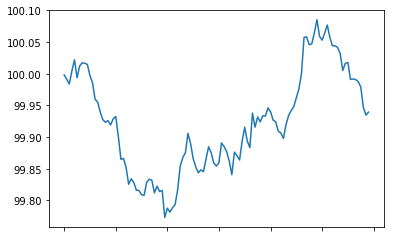

In [120]:
'''
http://blog.kaggle.com/2017/05/25/two-sigma-financial-modeling-challenge-winners-interview-2nd-place-nima-shahbazi-chahhou-mohamed/
b. Lag1.Feature: feature value on previous timestamp: featuret-1  #could be made for daily on a different way by shifting by timestamps
c. lag1.Feature_diff: featuret – featuret-1 #
d. lag1.Feature_absdiff: abs (featuret – featuret-1)
e. lag1.Feature_sumlag: featuret + featuret-1
f. Feature_AMean: feature → groupby(timestamp) → yields (mean)
python code: data.groupby(‘timestamp’).mean()
g. Feature_deMean: feature → groupby(timestamp) → yields (actual − mean)
python code: data.groupby(‘timestamp’).apply( lambda x : x-x.mean() )
'''
'''


'''
def get_daily_diff(df):
    return df.Ret_MinusOne - df.Ret_MinusTwo

def get_daily_abs_diff(df):
    return abs(df.Ret_MinusOne - df.Ret_MinusTwo)

def get_daily_sum(df):
    return df.Ret_MinusOne + df.Ret_MinusTwo

def get_last_minute_diff(df):
    return df.Ret_120-df.Ret_119
    
def get_abs_last_minute_ret(df):
    return abs(df.Ret_120-df.Ret_119)

def get_last_minute_sum(df):
    return df.Ret_120 + df.Ret_119


def get_grouped_mean(df, colnames):
    df = df.groupby(colnames, as_index=False).transform('mean')
    return df

def get_grouped_mad(df, colnames):
    df = df.groupby(colnames, as_index=False).transform('mad')
    return df

def get_grouped_rank_minute(df):
    ranked = df.groupby(['Feature_7','Feature_5']).transform('mean').loc[:, minute_ret_past_colnames]
    ranked['Feature_7'] = df.Feature_7
    return ranked.groupby('Feature_7', sort=False).rank(method='dense').loc[:, minute_ret_past_colnames]

def get_grouped_rank_daily(df):
    ranked = df.groupby(['Feature_7','Feature_5']).transform('mean').loc[:, daily_ret_past_colnames]
    ranked['Feature_7'] = df.Feature_7
    return ranked.groupby('Feature_7', sort=False).rank(method='dense').loc[:, daily_ret_past_colnames]

def get_interview_features(df):
    interview_features = pd.DataFrame(index=df.index)
    interview_features['daily_diff'] = get_daily_diff(df)
    interview_features['abs_daily_diff'] = get_daily_abs_diff(df)
    interview_features['daily_sum'] = get_daily_sum(df)
    interview_features['last_minute_diff'] = get_last_minute_diff(df)
    interview_features['abs_last_minute_diff'] = get_abs_last_minute_ret(df)
    interview_features['last_minute_sum'] = get_last_minute_sum(df)
    interview_features['last_minute_sum'] = get_last_minute_sum(df)
    
    interview_features['grouped_mean_fet_7'] = get_grouped_mean(df, ['Feature_7']).Ret_MinusOne
    interview_features['grouped_mean_fet_5'] = get_grouped_mean(df, ['Feature_5']).Ret_MinusOne
    interview_features['grouped_mad_fet_7'] = get_grouped_mad(df, ['Feature_7']).Ret_MinusOne
    interview_features['grouped_mad_fet_5'] = get_grouped_mad(df, ['Feature_5']).Ret_MinusOne
    interview_features['grouped_rank_daily_1'] = get_grouped_rank_daily(df).Ret_MinusOne
    interview_features['grouped_rank_daily_2'] = get_grouped_rank_daily(df).Ret_MinusTwo
    
    
    return interview_features

#get_grouped_mad(X_train, ['Feature_5']).head()
#get_grouped_rank_daily(X_train)
#get_prices(X_train.groupby('Feature_5').mean()).loc[5,:].plot()
#get_prices(X_train.groupby('Feature_5').mean()).loc[10,:].plot()

#get_prices(X_test.groupby('Feature_5').mean()).loc[5,:].plot()
#get_prices(X_test.groupby('Feature_5').mean()).loc[10,:].plot()

#get_prices(X_train.groupby('Feature_7').mean()).loc[338,:].plot()
#get_prices(X_test.groupby('Feature_7').mean()).loc[338,:].plot()

#get_prices(X_train.groupby(['Feature_7', 'Feature_5']).mean()).loc[(338, 5),:].plot()
#get_prices(X_test.groupby(['Feature_7', 'Feature_5']).mean()).loc[(338, 5),:].plot()
#get_prices(X_test.groupby(['Feature_7', 'Feature_5']).mean()).loc[(338, 3),:].plot()
#get_prices(X_test.groupby('Feature_7').mean()).loc[338,:].plot()

#(X_test.groupby('Feature_5').mean()).rank().loc[:, 'Ret_100':'Ret_120'].mean(axis=1)
#get_prices(X_train.groupby('Feature_5').mean()).rank().loc[:, 'Ret_100':'Ret_120'].mean(axis=1)
#get_prices(X_train.groupby('Feature_7').mean()).loc[:, 'Ret_100':'Ret_120'].rank().mean(axis=1)
#(X_train.groupby('Feature_7').mean()).loc[:, 'Ret_100':'Ret_120'].rank().mean(axis=1).plot.kde()
'''
get_prices(X_train.groupby('Feature_5').mean()).loc[:, 'Ret_100':'Ret_120'].rank(pct = True)
get_prices(X_train.groupby(['Feature_7', 'Feature_5']).mean())
X_train.groupby(['Feature_7', 'Feature_5']).mean().rank(method = 'dense')
X_train.groupby(['Feature_5']).mean().rank(method = 'dense')
#X_train.groupby(['Feature_7', 'Feature_5']).mean().rank(method = 'dense')

#X_train.groupby(['Feature_7']).get_group(338).groupby('Feature_5').mean().rank()
#df['Average'] = df.groupby('Country')['value'].transform('mean')
#df['Rank'] = df['Average'].rank(method='dense', ascending=False)
'''

'''
blabla = X_train.groupby(['Feature_7','Feature_5']).transform('mean').loc[:, minute_ret_past_colnames]
blabla['Feature_7'] = X_train.Feature_7

blabla1 = X_train.groupby(['Feature_7','Feature_5']).rank('dense')
blabla1['Feature_7'] = X_train.Feature_7
#blabla.groupby('Feature_7', sort=False).rank(method='dense').loc[:,['Ret_120','Ret_119']]
blabla1.head()

blabla.groupby('Feature_7').rank(method='dense')
'''
#get_interview_features(X_train).head()
#get_grouped_rank_daily(X_train)


In [9]:
#http://blog.kaggle.com/2017/05/11/two-sigma-financial-modeling-code-competition-5th-place-winners-interview-team-best-fitting-bestfitting-zero-circlecircle/
'''
Basic features. Original features from the dataset which two-sigma provided. ---> better encoding/handling missing values/different ways of handling missing values?
Calculated features and lag features. Get by using simple functions on basic features, such as abs, log, standard deviation, and so on. We also used features of last few timestamps which are called lag-N features.
Predicted features. Predicted from first level weak model. They were used in second level model.
Whole-market features. We tried to build some features to get information from whole market: increasing or decreasing, calm or volatile. They were also used in our self-adaptive strategy
'''

#Calculated features and lag features
X_train.loc[:,featureset_colnames].describe()
#mad std abs-dar log-dar quantiles quartiles skewness kurtosis
def get_descriptives(df):
    minutes = df.loc[:, minute_ret_past_colnames]
    descriptives = pd.DataFrame(index= minutes.index)
    descriptives['minute_sum'] = minutes.sum(axis=1)
    descriptives['minute_mean'] = minutes.mean(axis=1)
    descriptives['minute_mad'] = minutes.mad(axis=1)
    descriptives['minute_median'] = minutes.mad(axis=1)
    descriptives['minute_std'] = minutes.std(axis=1)
    descriptives['minute_var'] = minutes.var(axis=1)
    descriptives['minute_sem'] = minutes.sem(axis=1)
    descriptives['minute_skew'] = minutes.skew(axis=1)
    descriptives['minute_kurt'] = minutes.kurt(axis=1)
    descriptives['minute_25_quantile'] = minutes.quantile(q=0.25, axis=1)
    descriptives['minute_75_quantile'] = minutes.quantile(q= 0.75,axis=1)
    return descriptives

def get_smoothed_descriptives(df):
    minutes = get_smoothed_ret(df, 5, 1)
    descriptives = pd.DataFrame(index= minutes.index)
    descriptives['smoothed_minute_sum'] = minutes.sum(axis=1)
    descriptives['smoothed_minute_mean'] = minutes.mean(axis=1)
    descriptives['smoothed_minute_mad'] = minutes.mad(axis=1)
    descriptives['smoothed_minute_median'] = minutes.mad(axis=1)
    descriptives['smoothed_minute_std'] = minutes.std(axis=1)
    descriptives['smoothed_minute_var'] = minutes.var(axis=1)
    descriptives['smoothed_minute_sem'] = minutes.sem(axis=1)
    descriptives['smoothed_minute_skew'] = minutes.skew(axis=1)
    descriptives['smoothed_minute_kurt'] = minutes.kurt(axis=1)
    descriptives['smoothed_minute_25_quantile'] = minutes.quantile(q=0.25, axis=1)
    descriptives['smoothed_minute_75_quantile'] = minutes.quantile(q= 0.75,axis=1)
    return descriptives

#get_smoothed_descriptives(X_train)

#Whole-market features. We tried to build some features to get information from whole market: increasing or decreasing, calm or volatile. They were also used in our self-adaptive strategy

def get_market_indicators_fet7(df):
    grouped = df.groupby('Feature_7')
    market_indicators = pd.DataFrame(index=df.index)
    market_indicators['fet_7_RetMinOne_Mean'] = grouped.Ret_MinusOne.transform('mean')
    market_indicators['fet_7_RetMinTwo_Mean'] = grouped.Ret_MinusTwo.transform('mean')
    market_indicators['fet_7_RetMinOne_Mad'] = grouped.Ret_MinusOne.transform('mad')
    market_indicators['fet_7_RetMinTwo_Mad'] = grouped.Ret_MinusTwo.transform('mad')
    market_indicators['fet_7_diff_RetDaily_Mean'] = market_indicators['fet_7_RetMinOne_Mean'] - market_indicators['fet_7_RetMinTwo_Mean']
    market_indicators['fet_7_diff_RetDaily_Mad'] = market_indicators['fet_7_RetMinOne_Mad'] - market_indicators['fet_7_RetMinTwo_Mad']
    market_indicators['fet_7_absdiff_RetDaily_Mad'] = abs(market_indicators['fet_7_diff_RetDaily_Mad'])
    market_indicators['fet_7_absdiff_RetDaily_Mean'] = abs(market_indicators['fet_7_diff_RetDaily_Mean'])
    market_indicators['fet_7_RetMinOne_Count'] = grouped.Ret_MinusOne.transform('count')
    market_indicators['fet_7_RetMinTwo_Count'] = grouped.Ret_MinusTwo.transform('count')
    return market_indicators
    
'''
def get_merket_indicators_fet5(df):
    grouped = df.groupby('Feature_5')
'''

def get_market_indicators_fet7_fet5(df):
    market_indicators = pd.DataFrame(index=df.index)
    
    #ranks
    market_indicators['Rank_MinusOne'] = get_grouped_rank_daily(df).Ret_MinusOne
    market_indicators['Rank_MinusTwo'] = get_grouped_rank_daily(df).Ret_MinusTwo
    market_indicators['Diff_Ranked'] = market_indicators['Rank_MinusTwo'] - market_indicators['Rank_MinusOne']
    market_indicators['AbsDiff_Ranked'] = abs(market_indicators['Rank_MinusTwo'] - market_indicators['Rank_MinusOne'])
    market_indicators['Sum_Ranked'] = market_indicators['Rank_MinusTwo'] + market_indicators['Rank_MinusOne']
    
    #descriptives
    grouped = df.groupby(['Feature_7', 'Feature_5'])
    market_indicators['fet_7_fet_5_Ret_MinusOne_Mad'] = grouped.Ret_MinusOne.transform('mad')
    market_indicators['fet_7_fet_5_Ret_MinusTwo_Mad'] = grouped.Ret_MinusTwo.transform('mad')
    market_indicators['fet_7_fet_5_Ret_MinusOne_Mean'] = grouped.Ret_MinusOne.transform('mean')
    market_indicators['fet_7_fet_5_Ret_MinusTwo_Mean'] = grouped.Ret_MinusTwo.transform('mean')
    market_indicators['fet_7_fet_5_Diff_Daily_Mean'] = grouped.Ret_MinusOne.transform('mean') - grouped.Ret_MinusTwo.transform('mean')
    market_indicators['fet_7_fet_5_AbsDiff_Daily_Mean'] = abs(grouped.Ret_MinusOne.transform('mean') - grouped.Ret_MinusTwo.transform('mean'))
    market_indicators['fet_7_fet_5_Sum_Daily_Mean'] = grouped.Ret_MinusOne.transform('mean') + grouped.Ret_MinusTwo.transform('mean')
    
    market_indicators['fet_7_fet_5_Ret_Daily_Count'] = grouped.Ret_MinusOne.transform('count')
    
    #indicators
    return market_indicators
'''  
X_train.groupby('Feature_7').Ret_MinusOne.transform('mean')
X_train.groupby('Feature_5').Ret_MinusOne.transform('mean')
X_test.groupby('Feature_5').Ret_MinusOne.transform('mean')
X_test.groupby('Feature_5').Ret_MinusTwo.mean().sort_values()
X_train.groupby('Feature_5').Ret_MinusTwo.mean().sort_values()
X_train.groupby(['Feature_7','Feature_5']).Ret_MinusTwo.transform('mean')

X_train.groupby('Feature_7').Ret_MinusTwo.transform('mad') - X_train.groupby('Feature_7').Ret_MinusOne.transform('mad')
X_train.groupby(['Feature_7','Feature_5']).Ret_MinusTwo.transform('mean')

get_grouped_rank_daily(X_train).Ret_MinusTwo - get_grouped_rank_daily(X_train).Ret_MinusOne
abs(get_grouped_rank_daily(X_train).Ret_MinusTwo - get_grouped_rank_daily(X_train).Ret_MinusOne)
get_grouped_rank_daily(X_train).Ret_MinusTwo * get_grouped_rank_daily(X_train).Ret_MinusOne
get_grouped_rank_daily(X_train).Ret_MinusTwo + get_grouped_rank_daily(X_train).Ret_MinusOne
'''
#get_merket_indicators_fet7_fet5(X_train)

"  \nX_train.groupby('Feature_7').Ret_MinusOne.transform('mean')\nX_train.groupby('Feature_5').Ret_MinusOne.transform('mean')\nX_test.groupby('Feature_5').Ret_MinusOne.transform('mean')\nX_test.groupby('Feature_5').Ret_MinusTwo.mean().sort_values()\nX_train.groupby('Feature_5').Ret_MinusTwo.mean().sort_values()\nX_train.groupby(['Feature_7','Feature_5']).Ret_MinusTwo.transform('mean')\n\nX_train.groupby('Feature_7').Ret_MinusTwo.transform('mad') - X_train.groupby('Feature_7').Ret_MinusOne.transform('mad')\nX_train.groupby(['Feature_7','Feature_5']).Ret_MinusTwo.transform('mean')\n\nget_grouped_rank_daily(X_train).Ret_MinusTwo - get_grouped_rank_daily(X_train).Ret_MinusOne\nabs(get_grouped_rank_daily(X_train).Ret_MinusTwo - get_grouped_rank_daily(X_train).Ret_MinusOne)\nget_grouped_rank_daily(X_train).Ret_MinusTwo * get_grouped_rank_daily(X_train).Ret_MinusOne\nget_grouped_rank_daily(X_train).Ret_MinusTwo + get_grouped_rank_daily(X_train).Ret_MinusOne\n"

In [10]:
#http://blog.kaggle.com/2016/02/12/winton-stock-market-challenge-winners-interview-3rd-place-mendrika-ramarlina/
'''
Feature engineering was a key element in my approach. My final solution was an ensemble made up of 2 SVMs and 
1 regularized linear regression all trained on handcrafted features such as peak-to-valley drawdown magnitude 
and duration or cumulated intraday returns.
'''



'\nFeature engineering was a key element in my approach. My final solution was an ensemble made up of 2 SVMs and \n1 regularized linear regression all trained on handcrafted features such as peak-to-valley drawdown magnitude \nand duration or cumulated intraday returns.\n'

In [11]:
#pd.DataFrame(X_train.groupby('Feature_5').mean().loc[:, minute_ret_past_colnames].sum(axis=1)).reset_index()
'''
X_train = X_train.merge(pd.DataFrame(X_train.groupby('Feature_5').mean().loc[:, daily_ret_past_colnames].sum(axis=1), columns = ['Ret_MinusOne_Grouped_Mean_F5']).reset_index())
X_train = X_train.merge(pd.DataFrame(X_train.groupby('Feature_7').mean().loc[:, daily_ret_past_colnames].sum(axis=1), columns = ['Ret_MinusOne_Grouped_Mean_F7']).reset_index())
X_train = X_train.merge(pd.DataFrame(X_train.groupby(['Feature_7','Feature_5']).mean().loc[:, daily_ret_past_colnames].sum(axis=1), columns = ['Ret_MinusOne_Grouped_Mean_F7_F5']).reset_index())
'''

"\nX_train = X_train.merge(pd.DataFrame(X_train.groupby('Feature_5').mean().loc[:, daily_ret_past_colnames].sum(axis=1), columns = ['Ret_MinusOne_Grouped_Mean_F5']).reset_index())\nX_train = X_train.merge(pd.DataFrame(X_train.groupby('Feature_7').mean().loc[:, daily_ret_past_colnames].sum(axis=1), columns = ['Ret_MinusOne_Grouped_Mean_F7']).reset_index())\nX_train = X_train.merge(pd.DataFrame(X_train.groupby(['Feature_7','Feature_5']).mean().loc[:, daily_ret_past_colnames].sum(axis=1), columns = ['Ret_MinusOne_Grouped_Mean_F7_F5']).reset_index())\n"

In [12]:
#rw = X_train.loc[0, minute_ret_past_colnames].cumsum()
#rw2 = X_train.loc[0:2, minute_ret_past_colnames].cumsum(axis=1).loc[0,:]
#rw.plot()
#rw2.plot()
#X_train.loc[24, minute_ret_past_colnames].cumsum().plot()
'''
def max_drawdown(X):
    mdd = 0
    peak = X[0]
    for x in X:
        if x > peak: 
            peak = x
        
        dd = (peak - x)
        
        if dd > mdd:
            mdd = dd
    return mdd    
'''
def max_dd(ser):
    max2here = ser.expanding(min_periods=1).max()
    dd2here = ser - max2here
    return dd2here.min()

'''
#http://tradingwithpython.blogspot.de/2014/06/
def dd(s):
#    simple drawdown function
     
    highwatermark = np.zeros(len(s))
    drawdown = np.zeros(len(s))
    drawdowndur = np.zeros(len(s))
 
  
    for t in range(1,len(s)):
        highwatermark[t] = max(highwatermark[t-1], s[t])
        drawdown[t] = (highwatermark[t]-s[t])
        drawdowndur[t]= (0 if drawdown[t] == 0 else drawdowndur[t-1]+1)
        
      
    return drawdown , drawdowndur
'''


#drawSeries = max_drawdown(rw)
#print(drawSeries)
#rw2 = pd.Series([0, 0, 3, 3, -4, -1, 3, 0,]).cumsum()
#MaxDD = abs(drawSeries.min()*100)
#print(MaxDD)
#X_train.loc[4, minute_ret_past_colnames].cumsum().plot()
#rw.plot()
#test_dd = X_train.loc[0:7, minute_ret_past_colnames].cumsum(axis=1).apply(max_dd, axis=1)
#test_dd

#max_dd2(X_train.loc[4, minute_ret_past_colnames].cumsum())

def get_max_dd(df):
    return df.loc[:, minute_ret_past_colnames].cumsum(axis=1).apply(max_dd, axis=1)
    
#get_max_dd(X_train)

#X_train.loc[:, minute_ret_past_colnames].cumsum(axis=1).apply(max_dd, axis=1)

In [13]:
#http://pmorissette.github.io/ffn/

In [14]:
#custom
def get_delta_ret(df):
    cumret = df.loc[:,minute_ret_past_colnames].cumsum(axis=1)
    deltarets = pd.DataFrame(index=df.index)
    deltarets['Delta_120'] = cumret.Ret_120
    deltarets['Delta_119'] = cumret.Ret_119
    
    deltarets['Delta_last_5'] = df.loc[:,'Ret_116':'Ret_120'].cumsum(axis=1).Ret_120
    deltarets['Delta_last_10'] = df.loc[:,'Ret_111':'Ret_120'].cumsum(axis=1).Ret_120
    deltarets['Delta_last_60'] = df.loc[:,'Ret_61':'Ret_120'].cumsum(axis=1).Ret_120
    deltarets['Delta_first_60'] = df.loc[:,'Ret_2':'Ret_61'].cumsum(axis=1).Ret_61
    
    deltarets['Delta_dif_10_120'] = deltarets['Delta_last_10'] - deltarets['Delta_120']
    deltarets['Delta_dif_60_60']  = deltarets['Delta_last_60'] - deltarets['Delta_first_60']
    
    deltarets['Delta_div_10_120'] = deltarets['Delta_last_10'] / deltarets['Delta_120']
    deltarets['Delta_div_60_60'] = deltarets['Delta_last_60'] / deltarets['Delta_first_60']
    
    return deltarets

def get_mad(df):
    mads = pd.DataFrame(index=df.index)
    mads['MAD_120'] = df.loc[:, minute_ret_past_colnames].mad(axis=1)
    mads['MAD_last_60'] = df.loc[:, 'Ret_61': 'Ret_120'].mad(axis=1)
    mads['MAD_first_60'] = df.loc[:, 'Ret_2': 'Ret_60'].mad(axis=1)
    mads['MAD_last_30'] = df.loc[:, 'Ret_91': 'Ret_120'].mad(axis=1)
    mads['MAD_last_15'] = df.loc[:, 'Ret_106': 'Ret_120'].mad(axis=1)
    
    
    #ratio of last 15 to 120 stuff like that
    mads['MAD_div_60_60'] = mads['MAD_last_60'] / mads['MAD_first_60']
    mads['MAD_div_15_120'] = mads['MAD_last_15'] / mads['MAD_120']
    
    mads['MAD_dif_60_120'] = mads['MAD_last_60'] - mads['MAD_120']
    mads['MAD_dif_15_120'] = mads['MAD_last_15'] - mads['MAD_120']
    return mads

def get_some_interaction(df):
    mads = get_mad(df)
    deltarets = get_delta_ret(df)
    
    interaction = pd.DataFrame(index=df.index)
    interaction['inteaction_1']=  mads.MAD_120 * deltarets.Delta_last_5
    interaction['inteaction_2']=  mads.MAD_last_15 * deltarets.Delta_last_10
    return interaction
    
#get_some_interaction(X_train).head()

# Create a Featureset

In [127]:
'''
get_some_interaction
get_mad
get_delta_ret
get_market_indicators_fet7_fet5
get_market_indicators_fet7
get_smoothed_descriptives
get_descriptives
get_interview_features
'''


features = pd.concat([X_train.loc[:,featureset_colnames], get_some_interaction(X_train), get_mad(X_train), get_delta_ret(X_train), get_market_indicators_fet7_fet5(X_train), get_market_indicators_fet7(X_train),get_smoothed_descriptives(X_train), get_descriptives(X_train), get_interview_features(X_train)], axis=1)

#features.head()
test_features = pd.concat([X_test.loc[:,featureset_colnames], get_some_interaction(X_test), get_mad(X_test), get_delta_ret(X_test), get_market_indicators_fet7_fet5(X_test), get_market_indicators_fet7(X_test),get_smoothed_descriptives(X_test), get_descriptives(X_test), get_interview_features(X_test)], axis=1)


In [130]:
def get_features(df):
    features = pd.concat([df.loc[:,featureset_colnames],df.loc[:,daily_ret_past_colnames], get_some_interaction(df), get_mad(df), get_delta_ret(df), get_market_indicators_fet7_fet5(df), get_market_indicators_fet7(df),get_smoothed_descriptives(df), get_descriptives(df), get_interview_features(df)], axis=1)
    return features


In [114]:
features['Ret_MinusOne']= X_train.Ret_MinusOne
features['Ret_MinusTwo']= X_train.Ret_MinusTwo
features['max_dd']= get_max_dd(X_train)

test_features['Ret_MinusOne']= X_test.Ret_MinusOne
test_features['Ret_MinusTwo']= X_test.Ret_MinusTwo
test_features['max_dd']= get_max_dd(X_test)


In [115]:
print('features.shape:', features.shape, 'Test_Features.shape', test_features.shape)

features.shape: (26800, 106) Test_Features.shape (13200, 106)


# Feature Importance

Text(0.5,1,'Variable Importance')

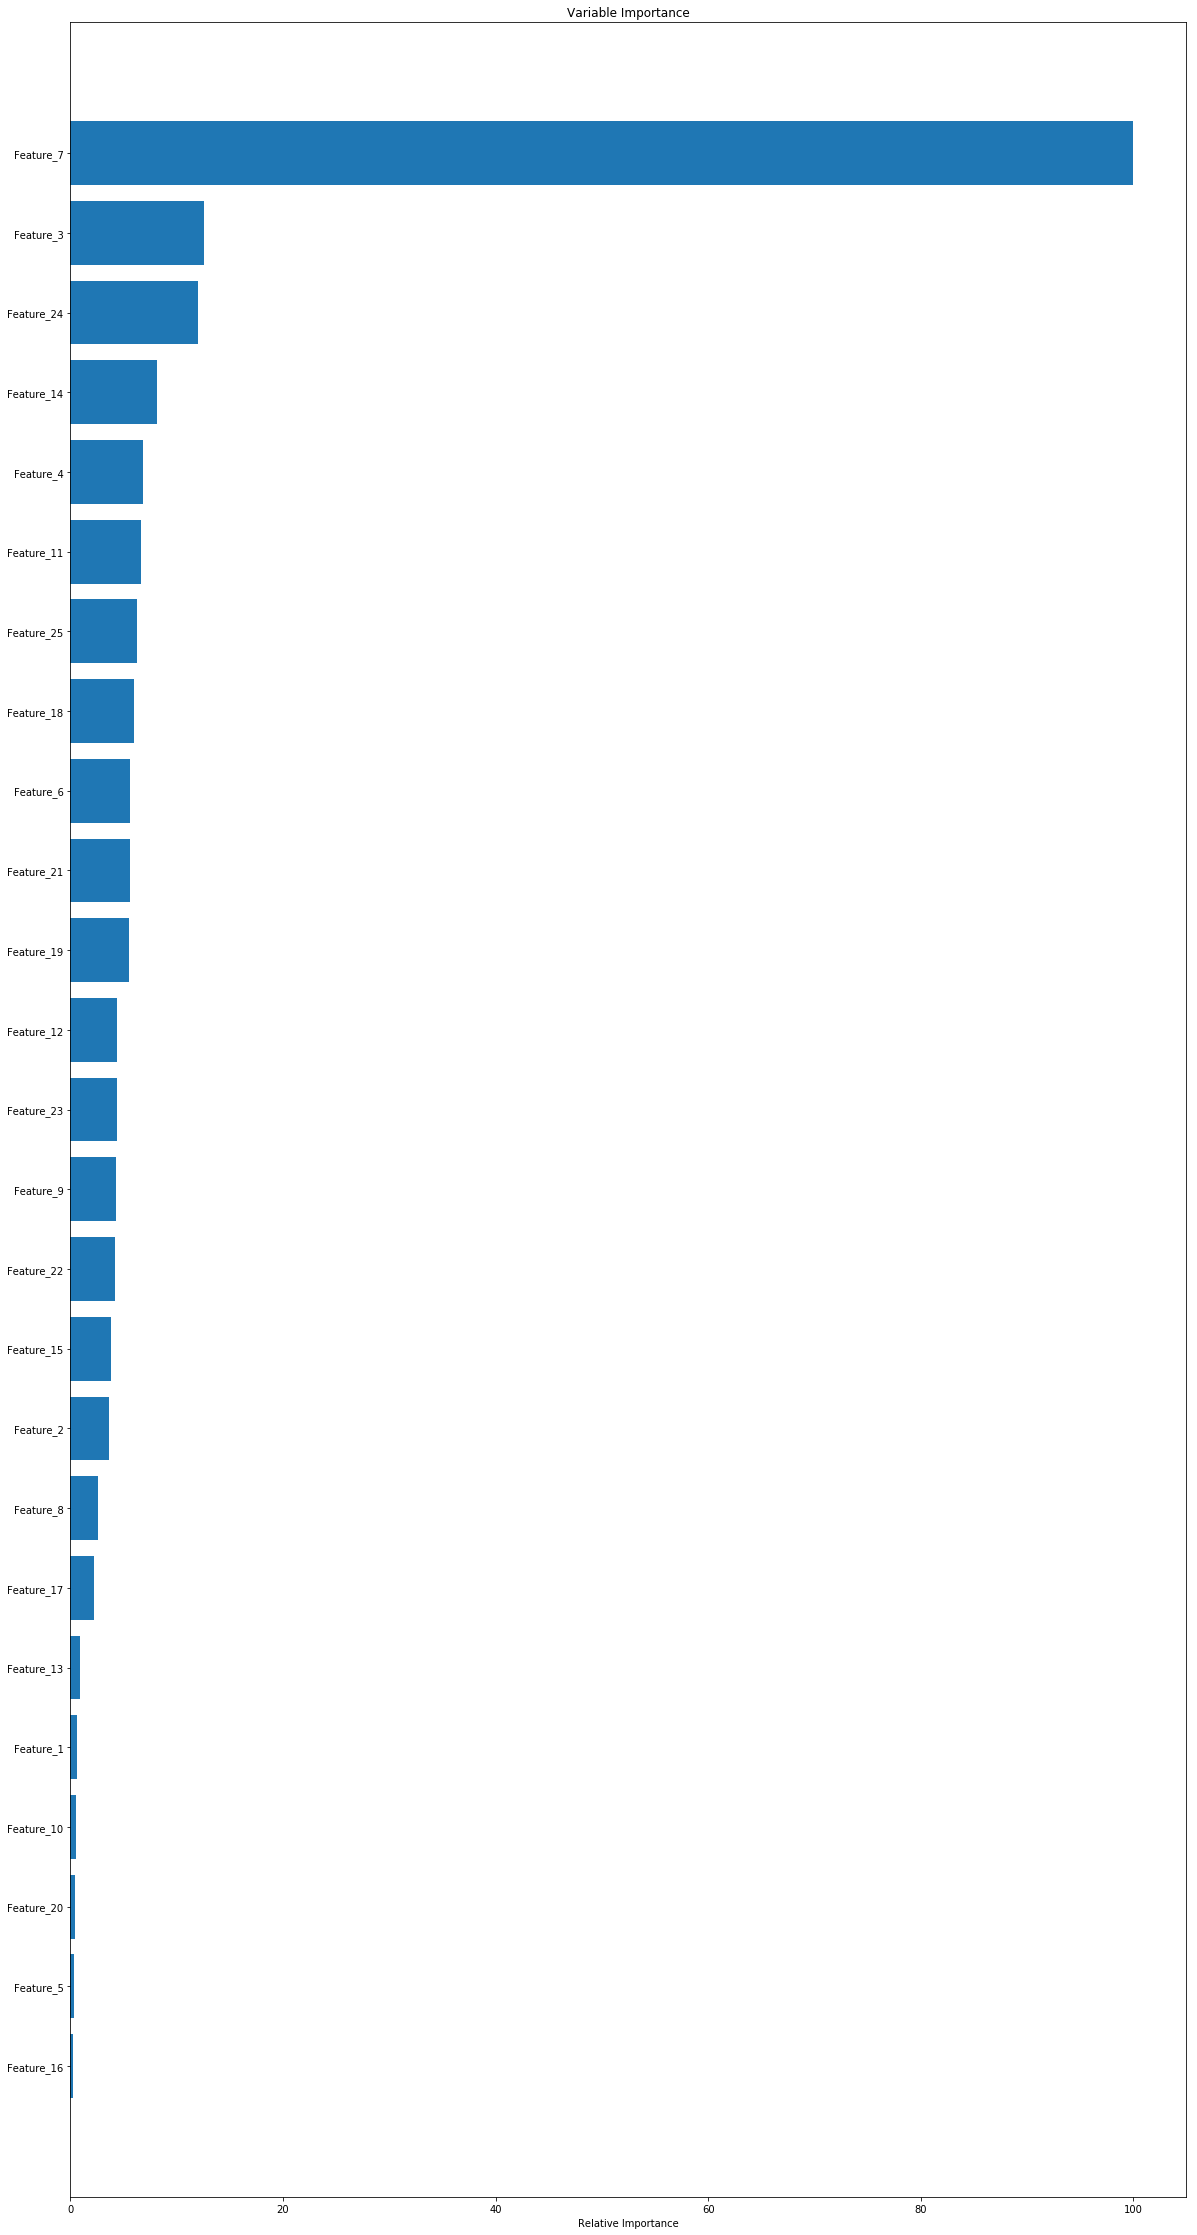

In [20]:

### Gradien Boost  ---> only allows one target value
from sklearn.ensemble import GradientBoostingRegressor

gbreg_train = GradientBoostingRegressor(loss='lad', random_state = 1)
gbreg_train.fit(X_train.loc[:, featureset_colnames], y_train['Ret_PlusOne'])

# Plot feature importance
feature_importance = gbreg_train.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')


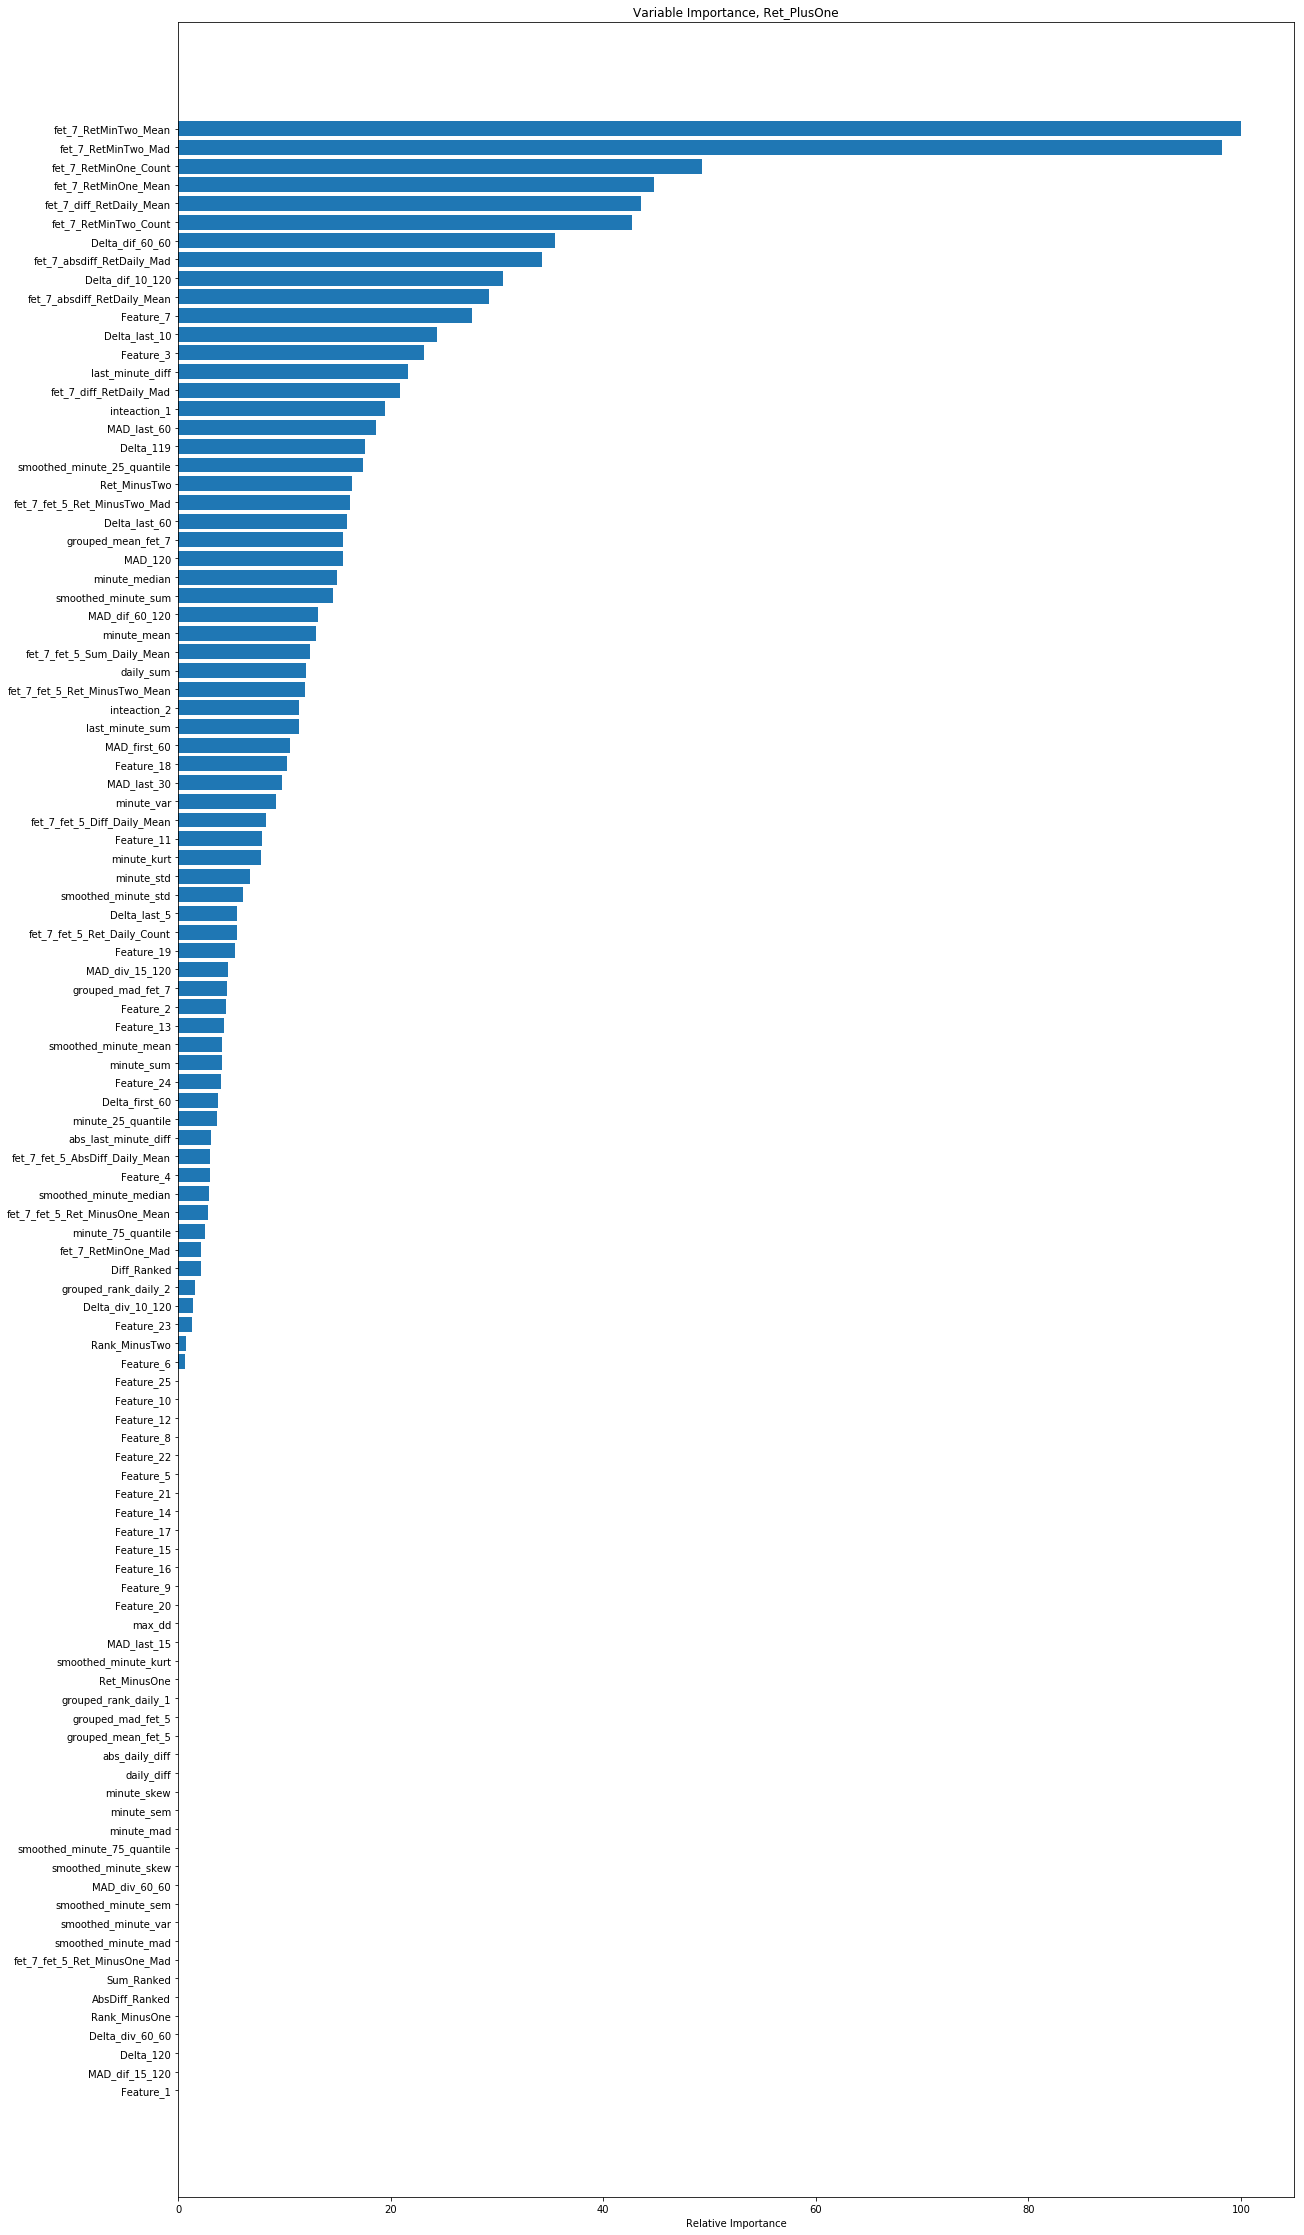

In [110]:
gbreg_train = GradientBoostingRegressor(random_state = 2, n_estimators =100, max_depth=2)
gbreg_train.fit(features, y_train['Ret_PlusOne'])

# Plot feature importance
feature_importance = gbreg_train.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance, Ret_PlusOne')
plt.savefig('graphs//Importance_GB_Ret_PlusOne.jpeg')


In [22]:
from sklearn.metrics import mean_absolute_error

In [25]:
gbr_score_train = mean_absolute_error(gbreg_train.predict(features), y_train.Ret_PlusOne)
gbr_score_test = mean_absolute_error(gbreg_train.predict(test_features), y_test.Ret_PlusOne)
zeroscore_train = mean_absolute_error(np.zeros(gbreg_train.predict(features).shape), y_train.Ret_PlusOne)
zeroscore_test = mean_absolute_error(np.zeros(gbreg_train.predict(test_features).shape), y_test.Ret_PlusOne)
#ridge_score_test = mean_absolute_error(ridge.predict(X_test), y_test)
#print('Results for unscaled and unweighted ridge regression')
print("Training score: ",gbr_score_train)
print("Test score: ",gbr_score_test)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)


Training score:  0.014912304763712213
Test score:  0.015694934732586777
Zero Score:  0.015805501973316205
Zero Score:  0.015640203947625705


In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.30, normalize=True)
ridge.fit(features, y_train.Ret_PlusOne)


ridge_score_train = mean_absolute_error(ridge.predict(features), y_train.Ret_PlusOne)
ridge_score_test = mean_absolute_error(ridge.predict(test_features), y_test.Ret_PlusOne)

zeroscore_train = mean_absolute_error(np.zeros(ridge.predict(features).shape), y_train.Ret_PlusOne)
zeroscore_test = mean_absolute_error(np.zeros(ridge.predict(test_features).shape), y_test.Ret_PlusOne)

print("Training score: ",ridge_score_train)
print("Test score: ",ridge_score_test)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)

Training score:  0.015765801606031738
Test score:  0.015688517969689078
Zero Score train:  0.015805501973316205
Zero Score test:  0.015640203947625705


In [29]:
ridge = Ridge(alpha=12.0, normalize=True)
ridge.fit(features, y_train.Ret_PlusOne, sample_weight=train_weight_daily.Weights)

ridge_score_train = mean_absolute_error(ridge.predict(features), y_train.Ret_PlusOne)
ridge_score_test = mean_absolute_error(ridge.predict(test_features), y_test.Ret_PlusOne)

zeroscore_train = mean_absolute_error(np.zeros(ridge.predict(features).shape), y_train.Ret_PlusOne)
zeroscore_test = mean_absolute_error(np.zeros(ridge.predict(test_features).shape), y_test.Ret_PlusOne)

print("Training score: ",ridge_score_train)
print("Test score: ",ridge_score_test)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)

Training score:  0.015792186642981185
Test score:  0.015849671309748563
Zero Score train:  0.015805501973316205
Zero Score test:  0.015640203947625705


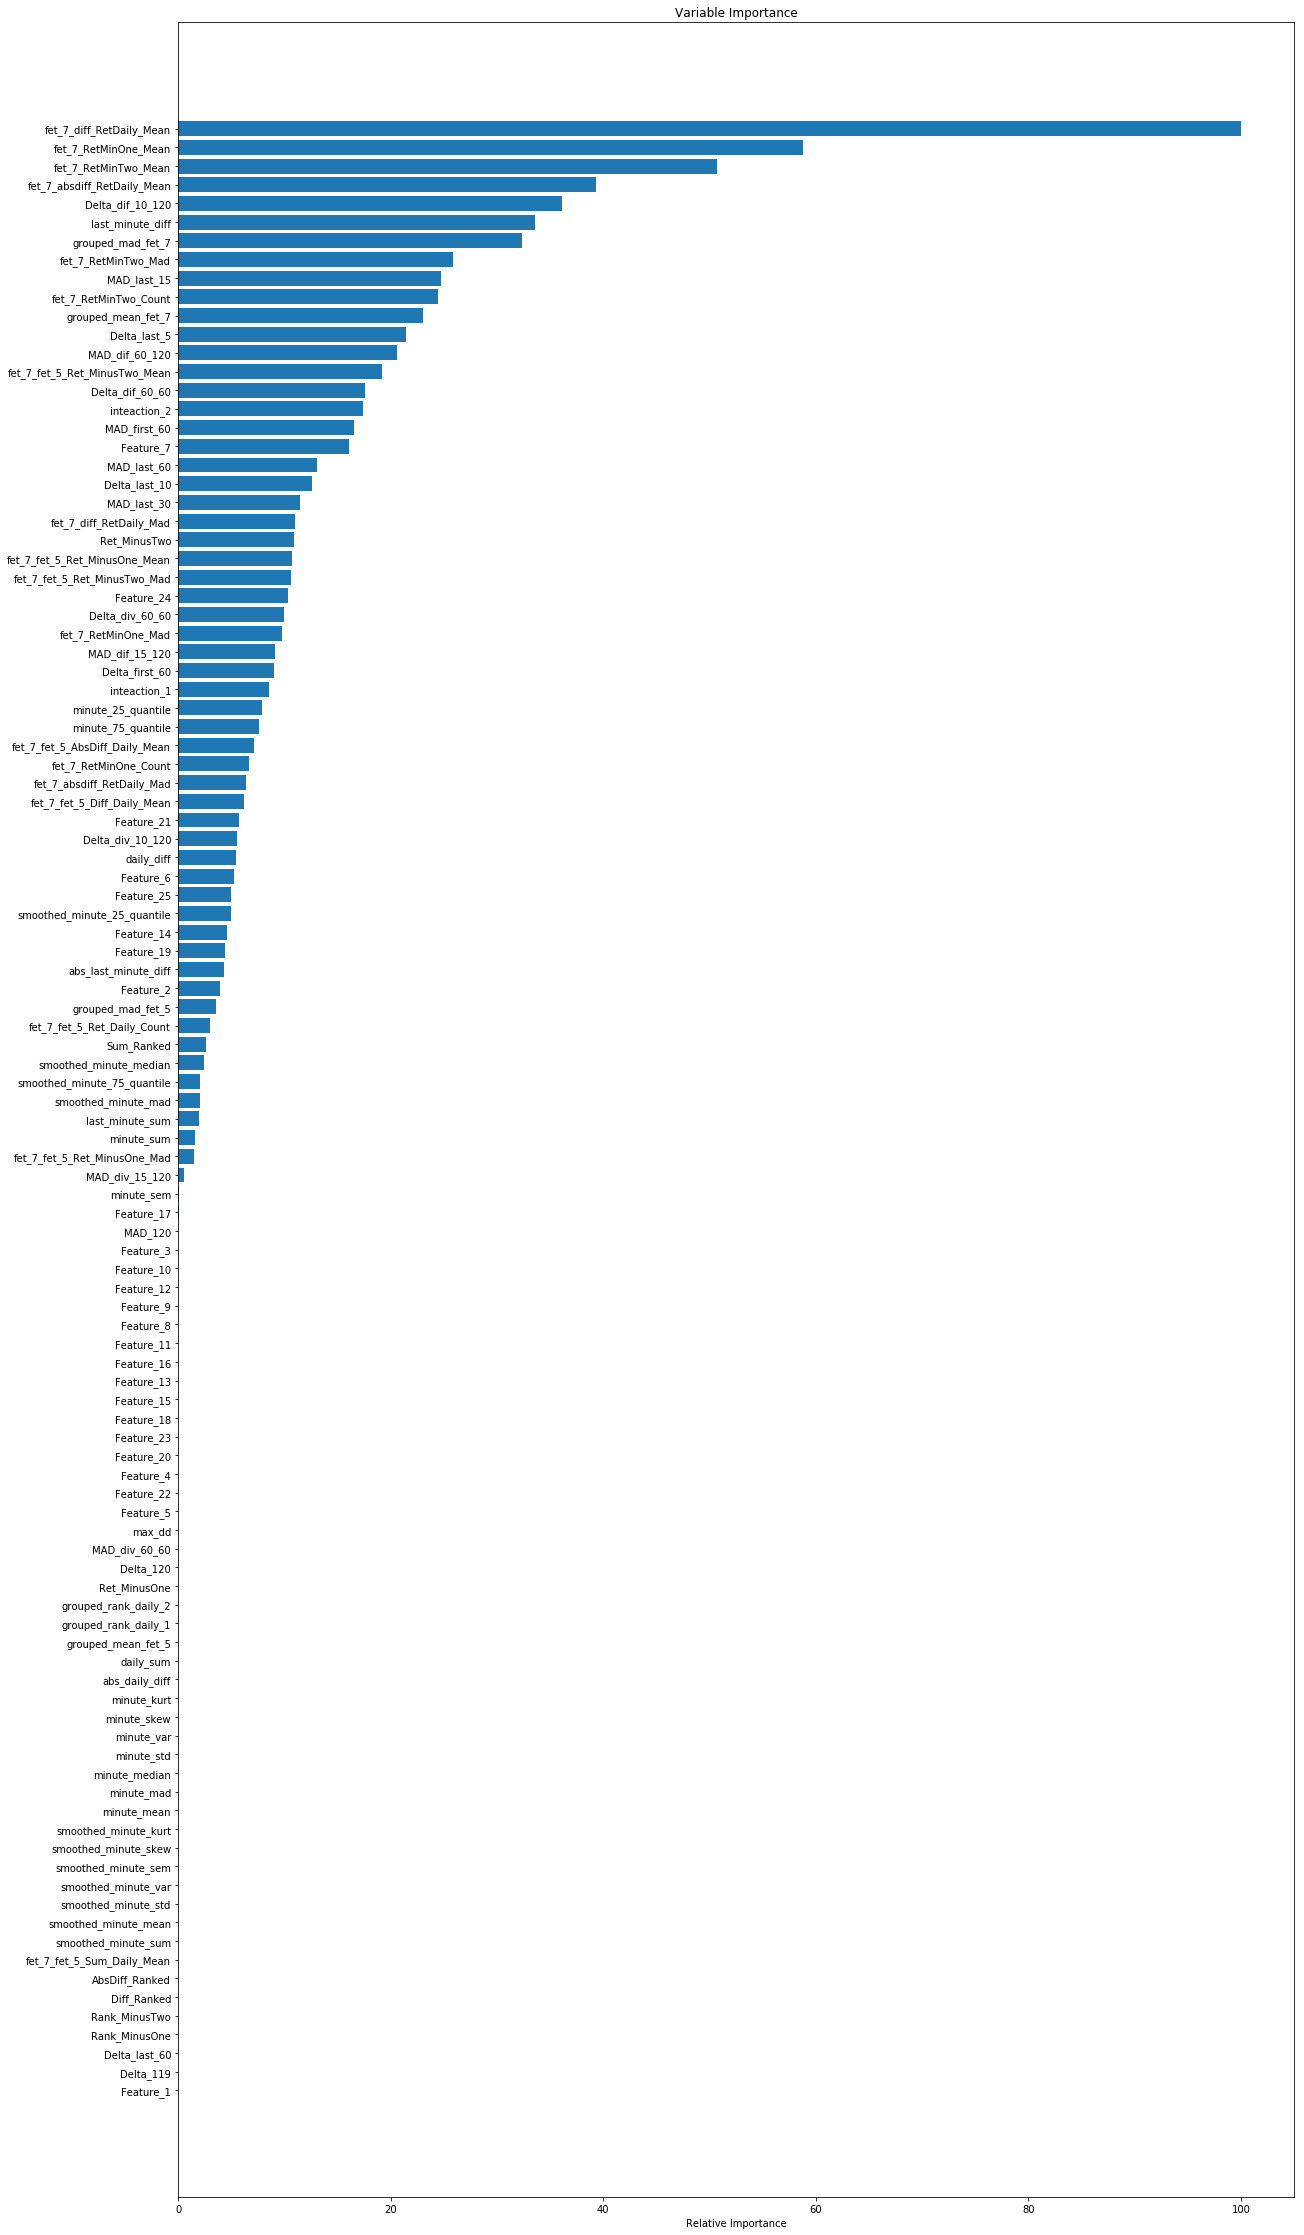

In [109]:
### GBR Ret_PlusTwo
gbreg_train = GradientBoostingRegressor(random_state = 2, n_estimators =100, max_depth=2)
gbreg_train.fit(features, y_train['Ret_PlusTwo'])

# Plot feature importance
feature_importance = gbreg_train.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('graphs//Importance_GB_Ret_PlusTwo.jpeg')

In [32]:
gbr_score_train = mean_absolute_error(gbreg_train.predict(features), y_train.Ret_PlusTwo)
gbr_score_test = mean_absolute_error(gbreg_train.predict(test_features), y_test.Ret_PlusTwo)

zeroscore_train = mean_absolute_error(np.zeros(gbreg_train.predict(features).shape), y_train.Ret_PlusOne)
zeroscore_test = mean_absolute_error(np.zeros(gbreg_train.predict(test_features).shape), y_test.Ret_PlusOne)
print("Training score: ",gbr_score_train)
print("Test score: ",gbr_score_test)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)

Training score:  0.014312672654454312
Test score:  0.015479472272139454
Zero Score train:  0.015805501973316205
Zero Score test:  0.015640203947625705


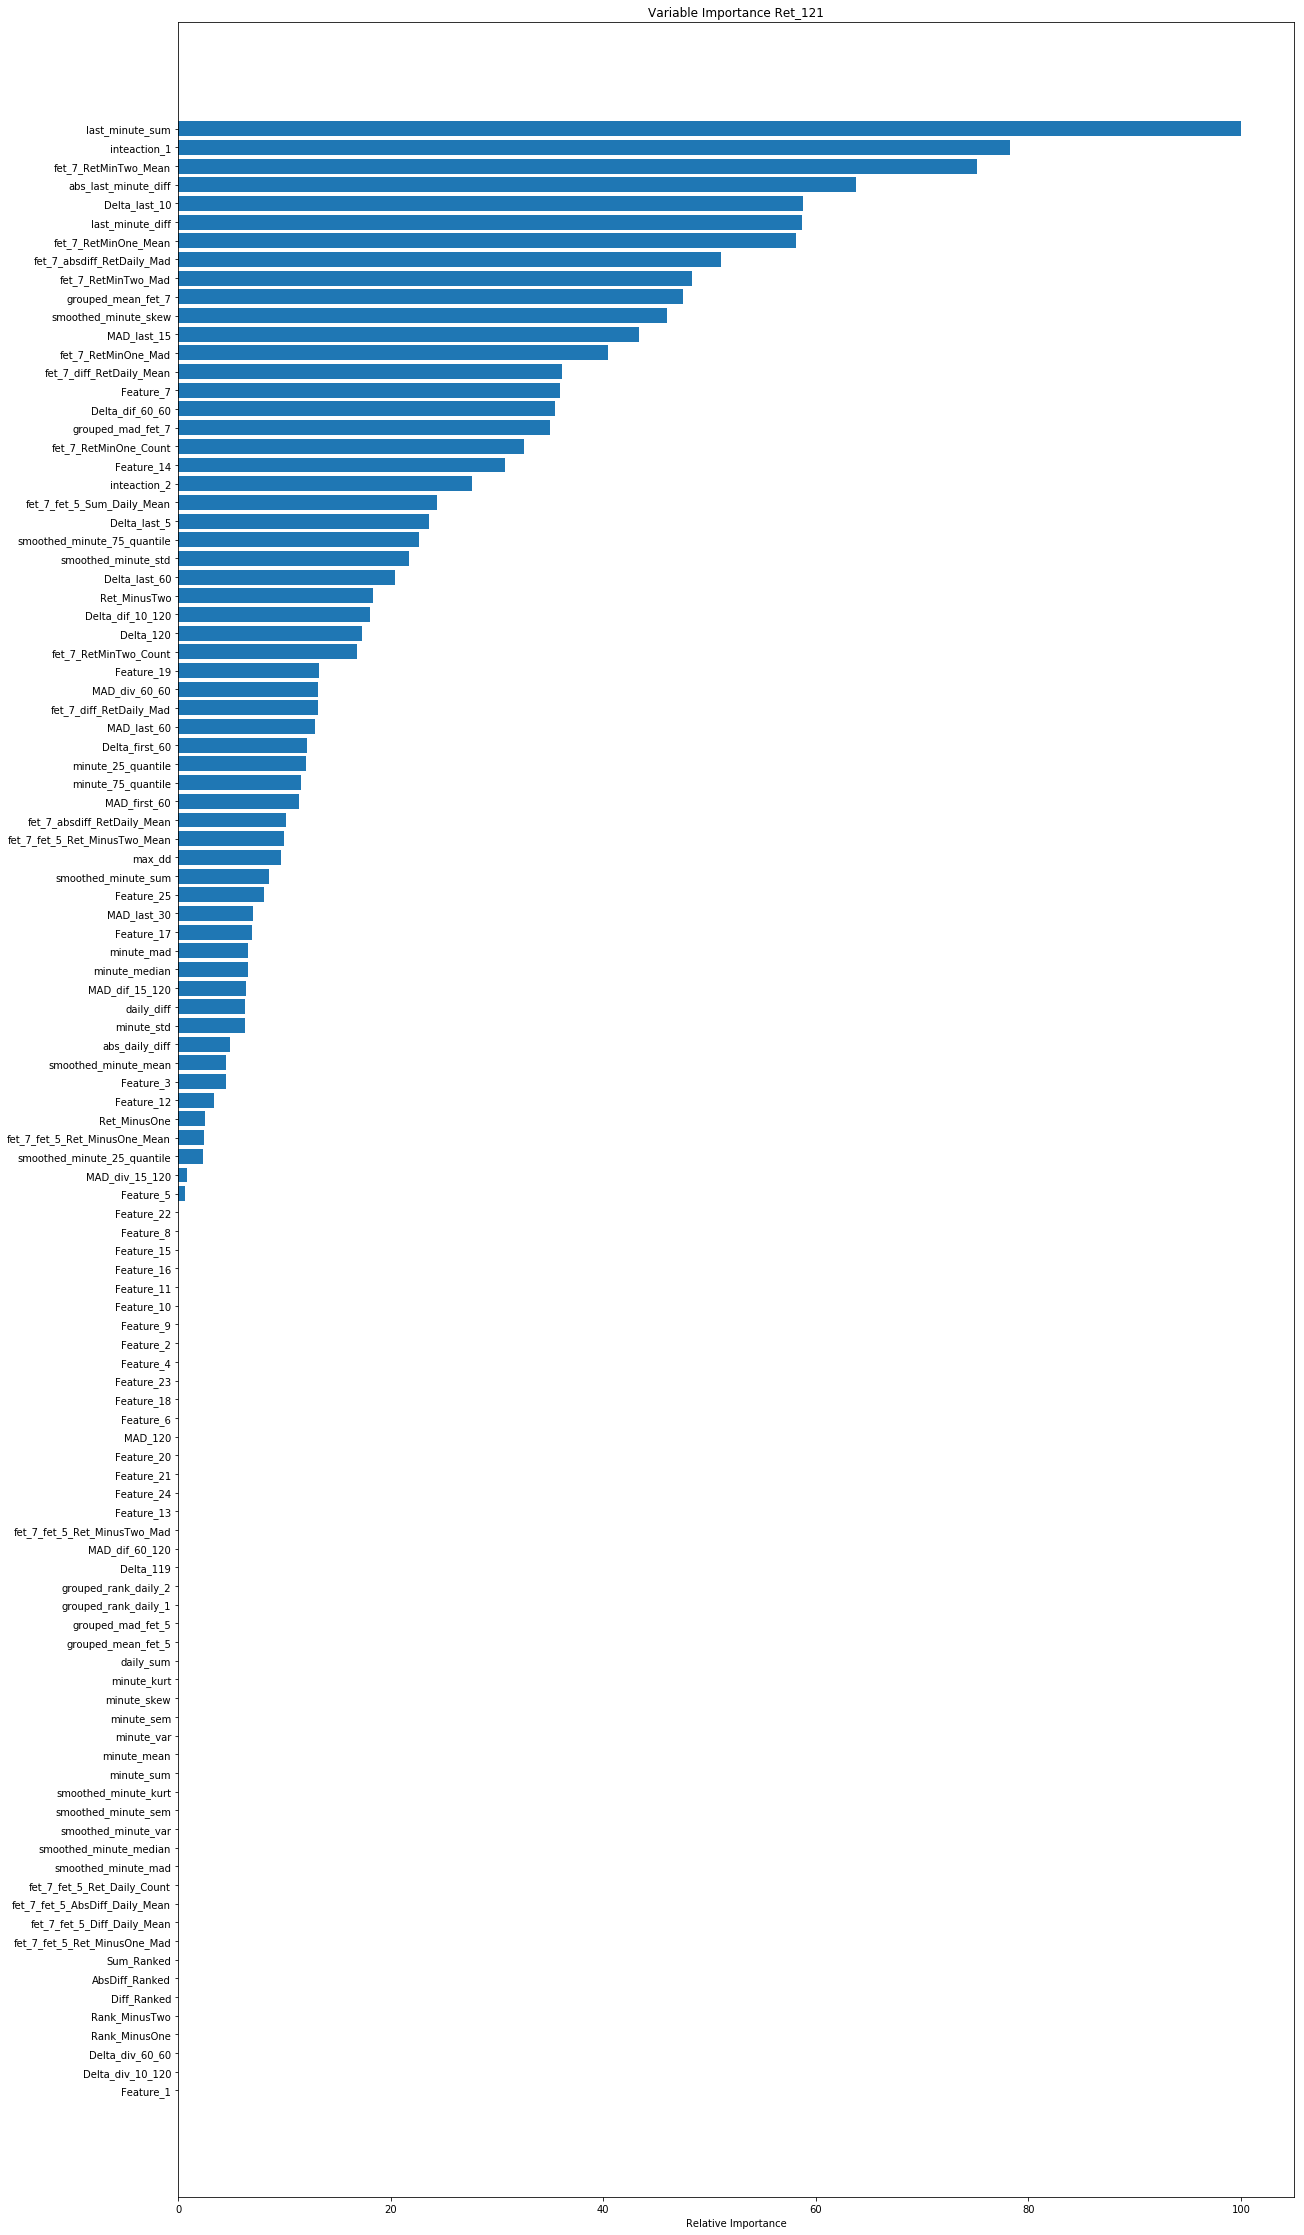

In [108]:
### GBR Ret_PlusTwo
gbreg_train = GradientBoostingRegressor(random_state = 2, n_estimators =100, max_depth=2)
gbreg_train.fit(features, y_train['Ret_121'])

# Plot feature importance
feature_importance = gbreg_train.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Ret_121')
plt.savefig('graphs//Importance_GB_Ret_121.jpeg')

In [35]:
gbr_score_train = mean_absolute_error(gbreg_train.predict(features), y_train.Ret_121)
gbr_score_test = mean_absolute_error(gbreg_train.predict(test_features), y_test.Ret_121)
zeroscore_train = mean_absolute_error(np.zeros(gbreg_train.predict(features).shape), y_train.Ret_121)
zeroscore_test = mean_absolute_error(np.zeros(gbreg_train.predict(test_features).shape), y_test.Ret_121)

print("Training score: ",gbr_score_train)
print("Test score: ",gbr_score_test)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)

Training score:  0.000568775888439531
Test score:  0.0006108981007534026
Zero Score train:  0.0005995443817893719
Zero Score test:  0.0006041316494972583


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(features, y_train.Ret_PlusOne)
# Predict
y_1 = regr_1.predict(test_features)





In [39]:
print('Decision Tree')
regr_1_train = mean_absolute_error(y_1, y_test.Ret_PlusOne)
regr_1_test = mean_absolute_error(y_1, y_test.Ret_PlusOne)
zeroscore = mean_absolute_error(np.zeros(y_1.shape), y_test.Ret_PlusOne)
#ridge_score_test = mean_absolute_error(ridge.predict(X_test), y_test)
#print('Results for unscaled and unweighted ridge regression')
print("Training score: ",regr_1_train)
print("Test score: ",regr_1_train)
print("Zero Score: ",zeroscore)



Decision Tree
Training score:  0.01568504760909949
Test score:  0.01568504760909949
Zero Score:  0.015640203947625705


In [40]:
### nuSVR
from sklearn.svm import NuSVR
clf = NuSVR(C=1.0, nu=0.1)
clf.fit(features.loc[:,'Feature_7':'Feature_8'], y_train.Ret_PlusOne)  




NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.1, shrinking=True, tol=0.001, verbose=False)

In [43]:
clf_train = mean_absolute_error(clf.predict(features.loc[:,'Feature_7':'Feature_8']), y_train.Ret_PlusOne)
clf_test = mean_absolute_error(clf.predict(test_features.loc[:,'Feature_7':'Feature_8']), y_test.Ret_PlusOne)
zeroscore = mean_absolute_error(np.zeros(clf.predict(features.loc[:,'Feature_7':'Feature_8']).shape), y_train.Ret_PlusOne)

zeroscore_train = mean_absolute_error(np.zeros(clf.predict(features.loc[:,'Feature_7':'Feature_8']).shape), y_train.Ret_PlusOne)
zeroscore_test = mean_absolute_error(np.zeros(clf.predict(test_features.loc[:,'Feature_7':'Feature_8']).shape), y_test.Ret_PlusOne)


print('nuSVR')
print("Training score: ",clf_train)
print("Test score: ",clf_test)
print("Zero Score: ",zeroscore)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)

nuSVR
Training score:  0.013848954352209923
Test score:  0.01430134911990743
Zero Score:  0.015805501973316205
Zero Score train:  0.015805501973316205
Zero Score test:  0.015640203947625705


In [46]:
#SVR
from sklearn.svm import SVR
clf1 = SVR(C=1.0, epsilon=0.2)
clf1.fit(features, y_train.Ret_121) 

clf1_train = mean_absolute_error(clf1.predict(features), y_train.Ret_121)
clf1_test = mean_absolute_error(clf1.predict(test_features), y_test.Ret_121)
zeroscore = mean_absolute_error(np.zeros(clf1.predict(features).shape), y_train.Ret_121)


#ridge_score_test = mean_absolute_error(ridge.predict(X_test), y_test)
#print('Results for unscaled and unweighted ridge regression')
print('SVR')
print("Training score: ",clf1_train)
print("Test score: ",clf1_test)
print("Zero Score: ",zeroscore)

SVR
Training score:  0.014749117790645513
Test score:  0.014744205782844319
Zero Score:  0.0005995443817893719


In [63]:
### Random Forrest Ret_121:Ret_125
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=1)
regr.fit(features, y_train.loc[:,'Ret_PlusOne':'Ret_PlusTwo'])   


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [64]:
regr_train = mean_absolute_error(regr.predict(features), y_train.loc[:,'Ret_PlusOne':'Ret_PlusTwo'])
regr_test = mean_absolute_error(regr.predict(test_features), y_test.loc[:,'Ret_PlusOne':'Ret_PlusTwo'])
zeroscore = mean_absolute_error(np.zeros(regr.predict(test_features).shape), y_test.loc[:,'Ret_PlusOne':'Ret_PlusTwo'])


print('Random Forrest')
print("Training score: ",regr_train)
print("Test score: ",regr_test)
print("Zero Score: ",zeroscore)

Random Forrest
Training score:  0.015302854821696002
Test score:  0.015469107555604553
Zero Score:  0.015525935866177534


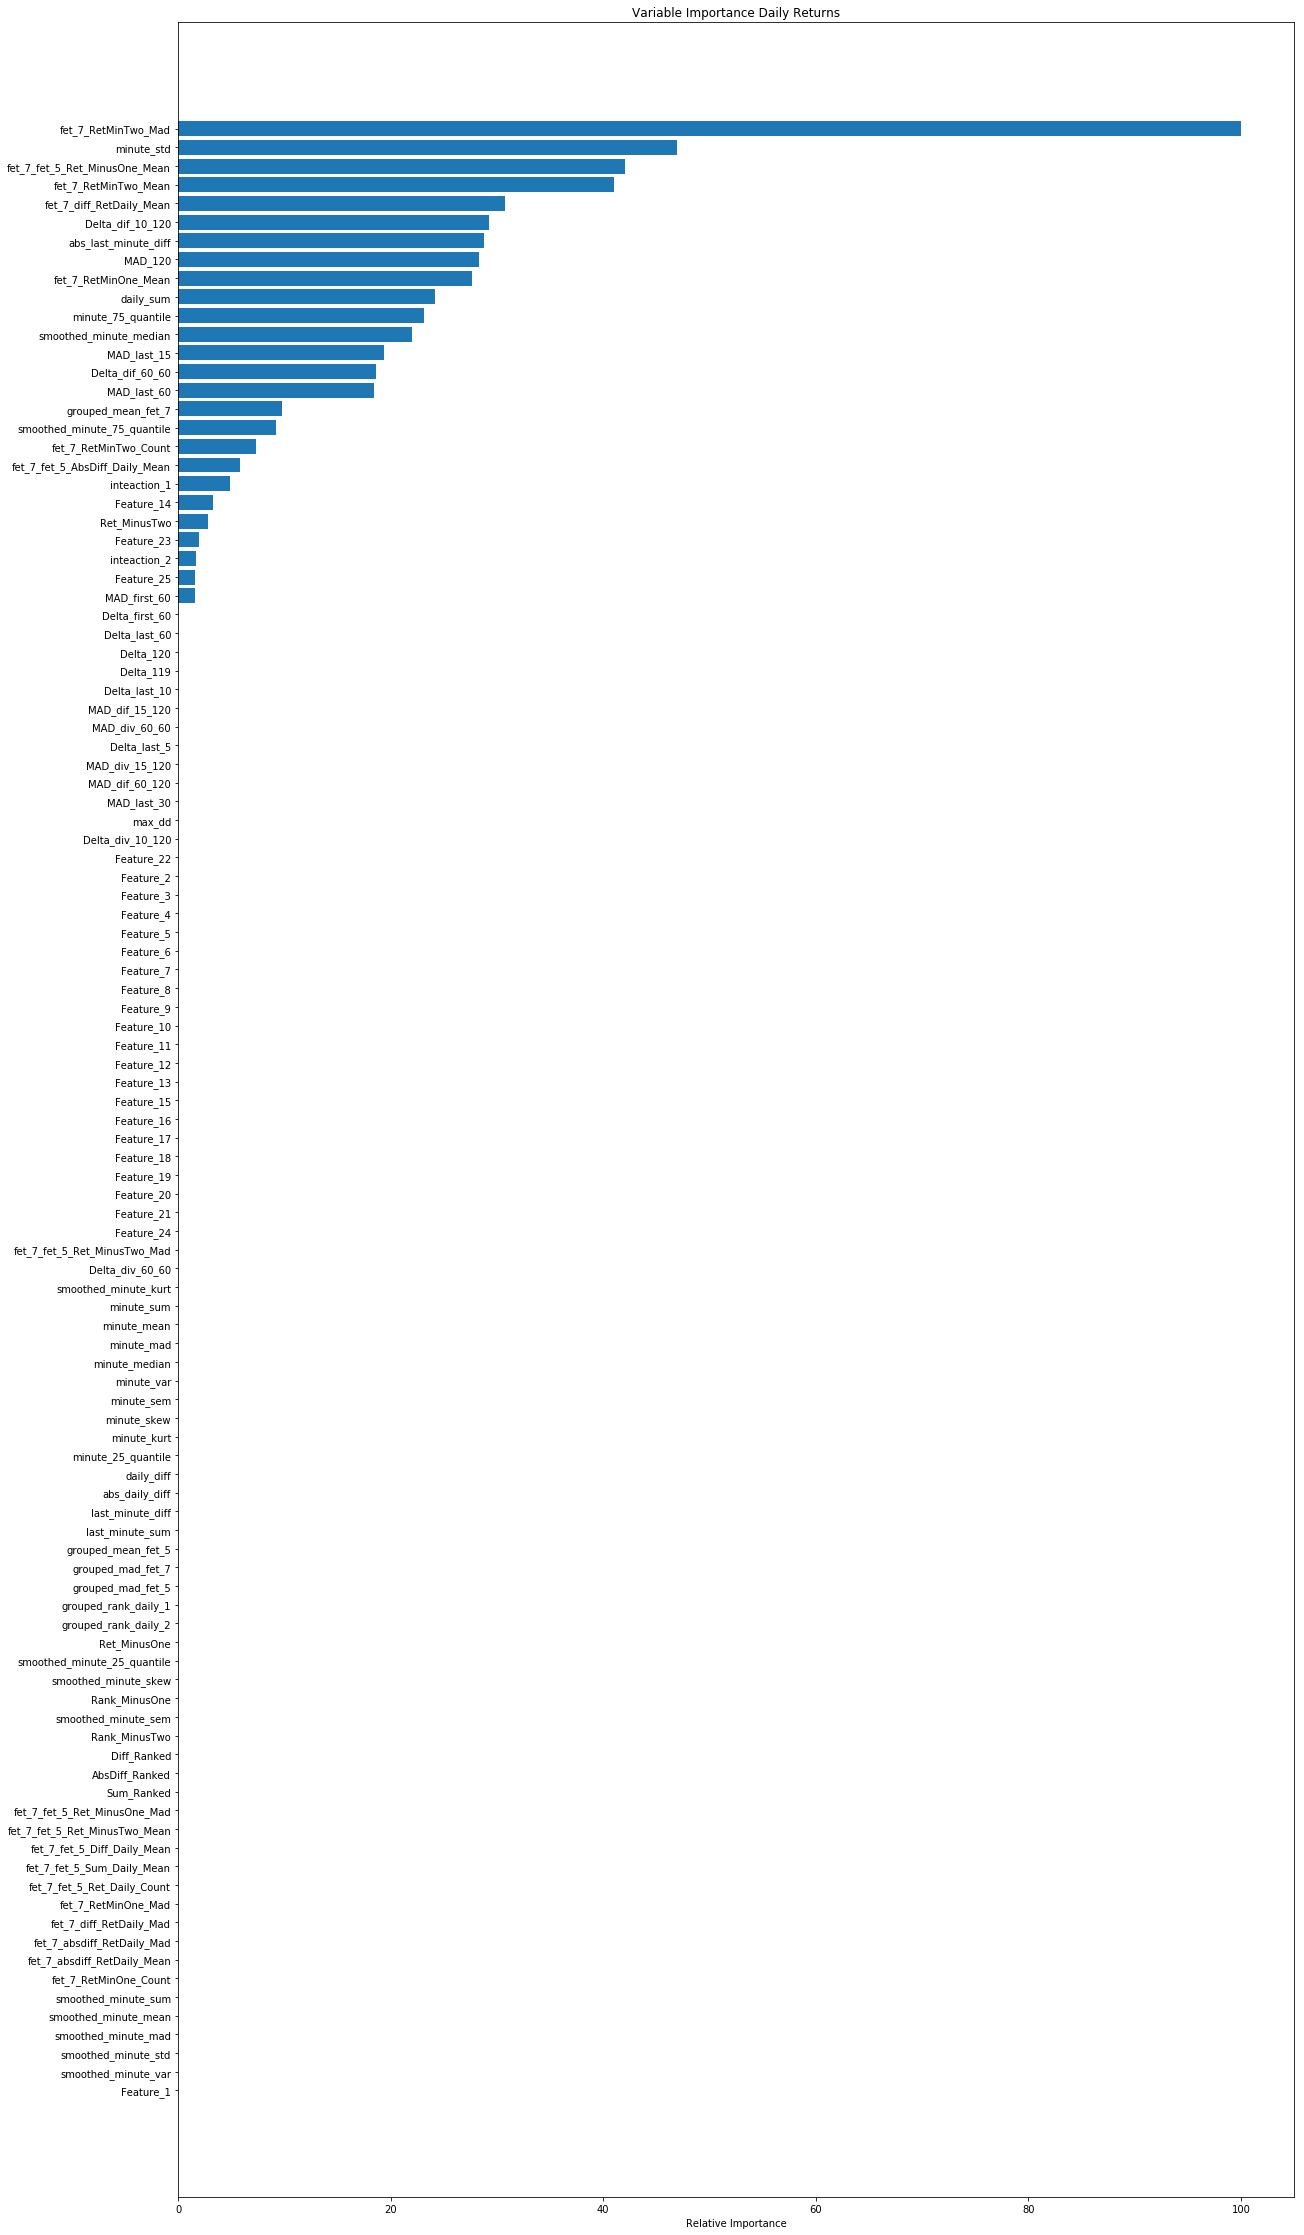

In [107]:
# Plot feature importance
feature_importance = regr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Daily Returns')
plt.savefig('graphs//Importance_RF_Daily_Returns.jpeg')

In [72]:
from sklearn.svm import NuSVR
feat_to_use = ['fet_7_diff_RetDaily_Mean','fet_7_RetMinOne_Mean','fet_7_RetMinTwo_Mean']
clf = NuSVR(C=1.0, nu=0.1)
clf.fit(features.loc[:,feat_to_use], y_train.Ret_PlusOne)  

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.1, shrinking=True, tol=0.001, verbose=False)

In [73]:
clf_train = mean_absolute_error(clf.predict(features.loc[:,feat_to_use]), y_train.Ret_PlusOne)
clf_test = mean_absolute_error(clf.predict(test_features.loc[:,feat_to_use]), y_test.Ret_PlusOne)
zeroscore = mean_absolute_error(np.zeros(clf.predict(test_features.loc[:,feat_to_use]).shape), y_test.Ret_PlusOne)


print('nuSVR')
print("Training score: ",clf_train)
print("Test score: ",clf_test)
print("Zero Score: ",zeroscore)

nuSVR
Training score:  0.015835134298196458
Test score:  0.0156759042803777
Zero Score:  0.015640203947625705


In [76]:
ridge = Ridge(alpha=.30, normalize=True)
ridge.fit(features, y_train)


ridge_score_train = mean_absolute_error(ridge.predict(features), y_train)
ridge_score_test = mean_absolute_error(ridge.predict(test_features), y_test)

zeroscore_train = mean_absolute_error(np.zeros(ridge.predict(features).shape), y_train)
zeroscore_test = mean_absolute_error(np.zeros(ridge.predict(test_features).shape), y_test)


print("Training score: ",ridge_score_train)
print("Test score: ",ridge_score_test)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)


Training score:  0.0011188771472358068
Test score:  0.0011355199259498
Zero Score train:  0.0011115543058074098
Zero Score test:  0.0011172654672785664


In [95]:
from sklearn.linear_model import Lasso

ridge = Lasso(normalize=True, random_state = 3)
ridge.fit(features, y_train.Ret_PlusOne)

ridge_score_train = mean_absolute_error(ridge.predict(features), y_train.Ret_PlusOne)
ridge_score_test = mean_absolute_error(ridge.predict(test_features), y_test.Ret_PlusOne)

zeroscore_train = mean_absolute_error(np.zeros(ridge.predict(features).shape), y_train.Ret_PlusOne)
zeroscore_test = mean_absolute_error(np.zeros(ridge.predict(test_features).shape), y_test.Ret_PlusOne)


print("Training score: ",ridge_score_train)
print("Test score: ",ridge_score_test)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)

Training score:  0.015804391512373266
Test score:  0.015637981077763725
Zero Score train:  0.015805501973316205
Zero Score test:  0.015640203947625705


In [101]:
ridge = Lasso(normalize=True, random_state = 2)
ridge.fit(features, y_train.loc[:, minute_ret_fut_colnames])

ridge_score_train = mean_absolute_error(ridge.predict(features), y_train.loc[:, minute_ret_fut_colnames])
ridge_score_test = mean_absolute_error(ridge.predict(test_features), y_test.loc[:, minute_ret_fut_colnames])

zeroscore_train = mean_absolute_error(np.zeros(ridge.predict(features).shape), y_train.loc[:, minute_ret_fut_colnames])
zeroscore_test = mean_absolute_error(np.zeros(ridge.predict(test_features).shape), y_test.loc[:, minute_ret_fut_colnames])


print("Training score: ",ridge_score_train)
print("Test score: ",ridge_score_test)
print("Zero Score train: ",zeroscore_train)
print("Zero Score test: ",zeroscore_test)

Training score:  0.0006333497975003817
Test score:  0.0006390820837435387
Zero Score train:  0.0006312703679738912
Zero Score test:  0.0006369764539819342


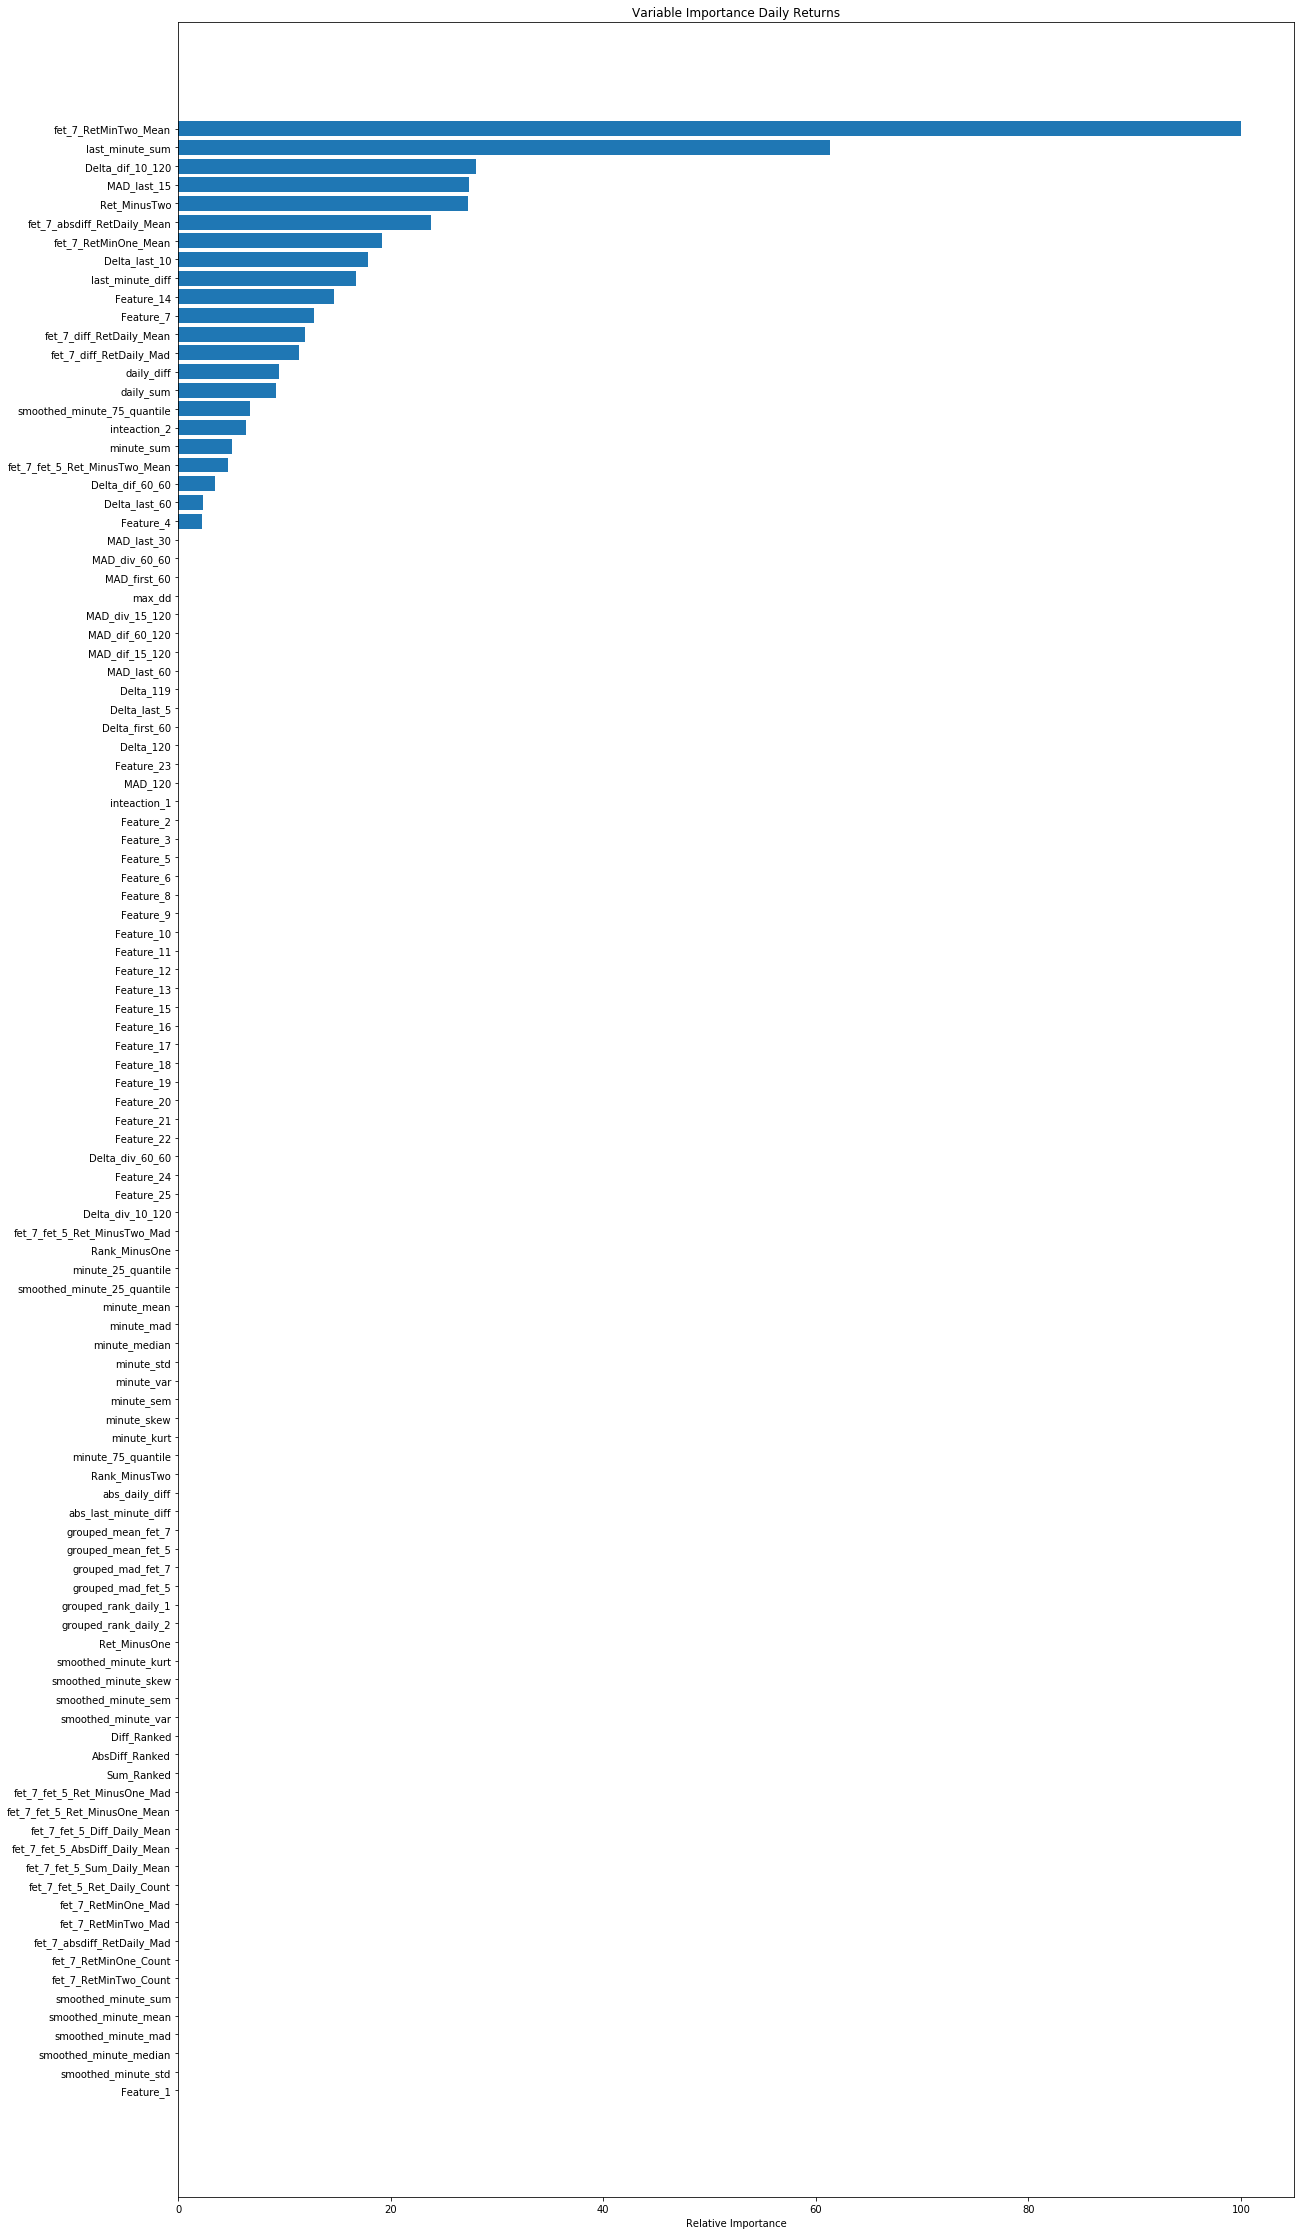

In [119]:
### Random Forrest Ret_121:Ret_125
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=1)
regr.fit(features, y_train.loc[:,'Ret_121':'Ret_180'])

# Plot feature importance
feature_importance = regr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Daily Returns')
plt.savefig('graphs//Importance_RF_Minute_Returns.jpeg')

# Features for Y

In [143]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
pd.DataFrame(binarizer.fit_transform(y_train), index=y_train.index, columns= y_train.columns)


,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,...,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
6,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
8,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


# Output Featureset

In [132]:
training_features = get_features(X_train)
test_features = get_features(X_test)

training_features.to_csv("featureset/X_train_features.csv")
test_features.to_csv("featureset/X_test_features.csv")


In [154]:
closedrolling = pd.DataFrame([[1,2,3,4],[4,5,6,4],[4,5,6,4],[4,5,6,4],[4,5,6,4]])

In [155]:
closedrolling

,0,1,2,3
0,1,2,3,4
1,4,5,6,4
2,4,5,6,4
3,4,5,6,4
4,4,5,6,4


In [175]:
y_train.loc[:,'Ret_121':'Ret_180'].shape

pd.DataFrame(columns = np.arange(1,13).repeat(6)).groupby('index', axis=1)


KeyError: 'index'